![image](./images/pandas.png)

Pandas est le package de prédilection pour traiter des données structurées.

Pandas est basé sur 2 structures extrêmement liées les Series et le DataFrame.

Ces deux structures permettent de traiter des données sous forme de tableaux indexés.

Les classes de Pandas utilisent des classes de Numpy, il est donc possible d'utiliser les fonctions universelles de Numpy sur les objets Pandas.

In [1]:
# on importe pandas avec :
import pandas as pd
import numpy as np
%matplotlib inline

# Les Series de Pandas

- Les Series sont indexées, c'est leur avantage sur les arrays de NumPy
- On peut utiliser les fonctions `.values` et `.index` pour voir les différentes parties de chaque Series
- On définit une Series par `pd.Series([,], index=['','',])`
- On peut appeler un élément avec `ma_serie['France']`
- On peut aussi faire des conditions :
```python
ma_serie[ma_serie>5000000]
```
```
'France' in ma_serie
```
- Les objets Series peuvent être transformés en dictionnaires en utilisant :
`.to_dict()`

**Exercice :**
    
Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [2]:
ser_pop = pd.Series([70,8,300,1200,40], index=["France","Suisse","USA", "Chine", "Espagne"])

In [3]:
ser_pop

France       70
Suisse        8
USA         300
Chine      1200
Espagne      40
dtype: int64

In [4]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(ser_pop) == pd.Series
print("Bien créée !")

Bien créée !


In [5]:
ser_pop>50

France      True
Suisse     False
USA         True
Chine       True
Espagne    False
dtype: bool

In [6]:
# on construit une série avec les populations de plus de 50
ser_pop_l50 = ser_pop[ser_pop>50]

In [7]:
ser_pop_l50

France      70
USA        300
Chine     1200
dtype: int64

In [8]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert ser_pop_l50.min() >= 50
print("Bravo !")

Bravo !


In [9]:
ser_pop["France"]

70

In [10]:
ser_pop.iloc[0]

70

# D'autres opérations sur les objets series

- Pour définir le nom de la Series, on utilise `.name`
- Pour définir le titre de la colonne des observations, on utilise `.index.name`

**Exercice :**
    
Définir les noms de l’objet et de la colonne des pays pour la Series précédente


In [11]:
ser_pop.name = "Populations"
ser_pop.index.name = "Pays"
ser_pop

Pays
France       70
Suisse        8
USA         300
Chine      1200
Espagne      40
Name: Populations, dtype: int64

# Les données manquantes

Dans pandas, les données manquantes sont identifiés avec les fonctions de Numpy (`np.nan`). On a d'autres fonctions telles que :

In [12]:
ser3 = pd.Series([2,np.nan,4],index=['a','b','c'])

In [13]:
pd.isna(pd.Series([2,np.nan,4],index=['a','b','c']))

a    False
b     True
c    False
dtype: bool

In [14]:
pd.notna(pd.Series([2,np.nan,4],index=['a','b','c']))

a     True
b    False
c     True
dtype: bool

# Les dates avec pandas

- Python possède un module datetime qui permet de gérer facilement des dates
- Pandas permet d'appliquer les opérations sur les dates aux Series et aux DataFrame
- Le format es dates Python est `YYYY-MM-DD HH:MM:SS`

- On peut générer des dates avec la fonction `pd.date_range()` avec différente fréquences `freq=`
- On peut utiliser ces dates comme index dans un DataFrame ou dans un objet Series
- On peut changer la fréquence en utilisant `.asfreq()`
- Pour transformer une chaine de caractère en date, on utilise `pd.to_datetime()` avec l’option `dayfirst=True` si on est dans le cas français
-On pourra aussi spécifier un format pour accélérer le processus `%Y%m%d`

**Exercice :**

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui. Afficher le résultat dans un graphique (on utilisera la méthode `.plot()`

*Indice :* Utilisez les informations ci-dessus

On utilisera :
```
pd.date_range(___)
np.random.randn(___)
pd.Series(___)
```

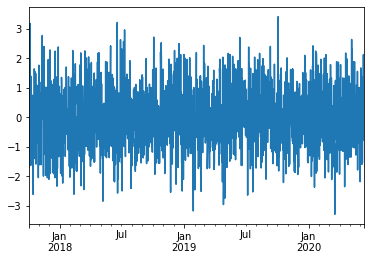

In [15]:
import datetime
dates = pd.date_range("2017-10-03",end=datetime.date.today(),freq="12H")
pd.Series(np.random.randn(len(dates)),index=dates).plot()

In [16]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
#assert len(serie_temp) == 911
#print("Bravo !")

# Le DataFrame 

- Les DataFrame sont des objets très souples pouvant être construits de différentes façon
- On peut les construire en récupérant des données copier / coller, où directement sur Internet, ou en entrant les valeurs manuellement


- Les DataFrame se rapprochent des dictionnaires et on peut construire ces objets en utilisant `DataFrame(dico)`
- De nombreux détails sur la création des DataFrame se trouve sur ce site :

<http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html>


# Construction de DataFrame

On peut simplement construire un DataFrame avec le classe pd.DataFrame() à partir de différentes structures :

In [17]:
frame1=pd.DataFrame(np.random.randn(10).reshape(5,2),
             index=["obs_"+str(i) for i in range(5)],
             columns=["col_"+str(i) for i in range(2)])
frame1

,col_0,col_1
obs_0,-1.539875,1.302021
obs_1,0.424041,-1.340241
obs_2,1.178272,2.803594
obs_3,1.510812,-0.321321
obs_4,0.637047,-1.979794


# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [18]:
print(frame1.columns)

Index(['col_0', 'col_1'], dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


# Options de visualisation et de résumé

Pour afficher les 3 premières lignes, on peut utiliser :


In [19]:
frame1.head(3)

,col_0,col_1
obs_0,-1.539875,1.302021
obs_1,0.424041,-1.340241
obs_2,1.178272,2.803594


Pour afficher un résumé du DF :

In [20]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, obs_0 to obs_4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_0   5 non-null      float64
 1   col_1   5 non-null      float64
dtypes: float64(2)
memory usage: 120.0+ bytes


# Importer des données externes

Pandas est l'outil le plus efficace pour importer des données externes, il prend en charge de nombreux formats dont csv, Excel, SQL, SAS...


## Importation de données avec Pandas

Quel que soit le type de fichier, Pandas possède une fonction :
```python
frame=pd.read_...('chemin_du_fichier/nom_du_fichier',...)
```
Pour écrire un DataFrame dans un fichier, on utilise :
```python
frame.to_...('chemin_du_fichier/nom_du_fichier',...)
```

**Exercice :**
    
Importer un fichier `.csv` avec `pd.read_csv()`. On utilisera le fichier "./data/airbnb.csv"

In [21]:
airbnb = pd.read_csv("https://www.stat4decision.com/airbnb.csv")

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert airbnb["price"].dtype == object
print("Bien importé !")

Bien importé !


In [23]:
airbnb.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20190507030954,2019-05-07,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,...,f,f,flexible,f,f,1,1,0,0,0.28
1,5396,https://www.airbnb.com/rooms/5396,20190507030954,2019-05-08,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.44
2,7397,https://www.airbnb.com/rooms/7397,20190507030954,2019-05-07,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,2.47


In [24]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59126 entries, 0 to 59125
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 47.8+ MB


Importer un fichier `.csv` qui a comme séparateur `;`, le nom du fichier est `base-dpt.csv`

In [25]:
base_dpt = pd.read_csv("./data/base-dpt.csv",sep=";")

In [26]:
base_dpt.head()

,CODGEO,LIBGEO,REG,DEP,P14_POP,P09_POP,SUPERF,NAIS0914,DECE0914,P14_MEN,...,ETAZ15,ETBE15,ETFZ15,ETGU15,ETGZ15,ETOQ15,ETTEF115,ETTEFP1015,Geo Shape,geo_point_2d
0,95555,Saint-Gratien,11,95,20996.0,20258.0,2.42,1564.0,749.0,8909.817815,...,3.0,38.0,142.0,1078.0,225.0,214.0,335.0,67.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.274621...","48.9695044801, 2.28470111182"
1,95488,Pierrelaye,11,95,8155.0,7920.0,9.21,639.0,243.0,2891.000000,...,8.0,47.0,135.0,623.0,241.0,65.0,228.0,72.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.193617...","49.0190794714, 2.1606870483"
2,95543,Saint-Cyr-en-Arthies,11,95,242.0,229.0,3.89,9.0,4.0,93.154812,...,2.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,"{""type"": ""Polygon"", ""coordinates"": [[[1.732068...","49.058878265, 1.74176317637"
3,95523,La Roche-Guyon,11,95,446.0,447.0,4.61,18.0,21.0,186.507593,...,0.0,6.0,6.0,48.0,17.0,14.0,13.0,4.0,"{""type"": ""Polygon"", ""coordinates"": [[[1.623323...","49.0883415268, 1.63442788467"
4,95678,Villiers-Adam,11,95,838.0,828.0,9.82,45.0,29.0,340.831981,...,6.0,3.0,8.0,53.0,12.0,5.0,14.0,2.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.236020...","49.0697597649, 2.23847351378"


In [27]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(base_dpt) == pd.DataFrame
print("Bien importé !")

Bien importé !


# D'autres types de données

## JSON
Les objets JSON ressemblent à des dictionnaires.

On utilise le module `json` puis la fonction `json.loads()` pour transformer une entrée JSON en objet json

## HTML
On utilise `pd.read_html(url)`. Cet fonction est basée sur les packages `beautifulsoup` et `html5lib`

Cette fonction renvoie une liste de DataFrame qui représentent tous les DataFrame de la page. On ira ensuite chercher l'élément qui nous intéresse avec `frame_list[0]`

**Exercice :**
    
Importez un tableau en html depuis la page <http://www.fdic.gov/bank/individual/failed/banklist.html> 

In [28]:
web_bank = pd.read_html("http://www.fdic.gov/bank/individual/failed/banklist.html")

In [29]:
print(type(web_bank),type(web_bank[0]),len(web_bank))

<class 'list'> <class 'pandas.core.frame.DataFrame'> 1


In [30]:
frame_bank = web_bank[0]

In [31]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(frame_bank) == pd.DataFrame
print("Bien importé !")

Bien importé !


In [32]:
frame_bank.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date
0,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020"
1,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020"
2,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019"
3,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,"October 25, 2019"
4,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,"October 25, 2019"


# Importer depuis Excel

On a deux approches pour Excel :
- On peut utiliser `pd.read_excel()`
- On peut utiliser la classe `pd.ExcelFile()`

Dans ce cas, on utilise :
```python
xlsfile=pd.ExcelFile('fichier.xlsx')
xlsfile.parse('Sheet1')
```

**Exercice :** 
    
Importez un fichier Excel avec les deux approches, on utilisera : `credit2.xlsx` et `ville.xls`

1- avec `pd.read_excel()` pour le fichier `credit2.xlsx`

In [33]:
credit2 = pd.read_excel("./data/credit2.xlsx",index_col="Customer_ID")

In [34]:
credit2.head()

,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner
Customer_ID,,,,,,,,,
5409,40,F,S,11,6,37,56,37073,F
5477,47,M,M,13,13,30,56,50721,F
5507,35,F,U,1,9,33,57,43578,T
8,45,M,U,15,7,30,62,69553,F
158,13,F,S,0,7,27,64,37502,T


In [35]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert credit2["Age"].max() == 83
print("Bravo !")

Bravo !


2- avec `pd.ExcelFile()` pour le fichier `ville.xls`

In [36]:
ville_excel = pd.ExcelFile("./data/ville.xls")

In [37]:
ville_excel.sheet_names

['ville', 'ville-ain']

In [38]:
frame_ville = ville_excel.parse("ville")

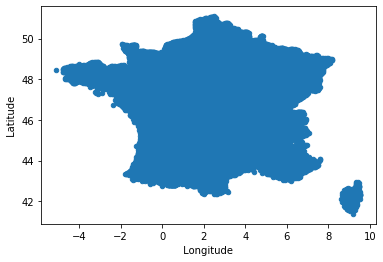

In [39]:
frame_ville.plot(y=" Latitude ",x=" Longitude ",kind="scatter")

In [40]:
frame_ville.columns

Index(['NomVille', 'MAJ   ', ' Code Postal ', ' Code INSEE ', 'Code Région',
       ' Latitude ', ' Longitude ', ' Eloignement '],
      dtype='object')

In [41]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(frame_ville) == pd.DataFrame
print("Bravo !")

Bravo !


# Importer des données SQL

Pandas possède une fonction `read_sql()` qui permet d’importer directement des bases de données ou des queries dans des DataFrame

Il faut tout de même un connecteur pour accéder aux bases de données

Pour mettre en place ce connecteur, on utlise le package SQLAlchemy.

Suivant le type de base de données, on utilisera différents codes mais la structure du code est toujours la même

In [42]:
# on importe l'outil de connexion
from sqlalchemy import create_engine

On crée une connexion
```python
connexion=create_engine("sqlite:///(...).sqlite")
```

On utlise une des fonctions de Pandas pour charger les données
```python
requete="""select ... from ..."""
frame_sql=pd.read_sql_query(requete,connexion)
```

**Exercices :**
    
Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 

*Indice :* On commence par créer la connexion et ensuite on fait la requête `select * from salaries`, la connexion se fait en utilisant l'adresse : "sqlite:///./data/salaries.sqlite"

In [43]:
connexion=create_engine("sqlite:///./data/salaries.sqlite")
salaries = pd.read_sql_query("select * from salaries",connexion)

In [44]:
connexion.table_names()

['Salaries']

In [45]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


In [46]:
# ajout d'une nouvelle table
#salaries.to_sql("salaries2",connexion)

In [47]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert type(salaries) == pd.DataFrame
print("Bravo !")

Bravo !


# Les tris avec Pandas 

Pour effectuer des tris, on utilise :
- `.sort_index()` pour le tri des index
- `.sort_values()` pour le tri des données
- `.rank()` affiche le rang des observations

Il peut y avoir plusieurs tris dans la même opération. Dans ce cas, on utilise des listes de colonnes :
```python
frame.sort_values(["col_1","col_2"])
```

**Exercice :** 
    
Triez les données sur les salaires en se basant sur le TotalPay et le JobTitle

In [48]:
salaries_sorted = salaries.sort_values(["JobTitle","TotalPay"],ascending=[True,False])
salaries_sorted.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
20765,20766,NAPOLEON VIRAY,ACCOUNT CLERK,60838.2,0,0,,60838.20,60838.20,2011,,San Francisco,
20867,20868,BERNADETTE RAMOS,ACCOUNT CLERK,49777.8,10753.1,0,,60530.87,60530.87,2011,,San Francisco,
21638,21639,SUSAN CHANG,ACCOUNT CLERK,51306.3,5406.34,1814.58,,58527.20,58527.20,2011,,San Francisco,
22972,22973,OLIVIA BOUDREAUX,ACCOUNT CLERK,49778.2,3811.68,1084.76,,54674.59,54674.59,2011,,San Francisco,
24132,24133,LI-XIN CAI,ACCOUNT CLERK,49777.8,1390.45,624,,51792.25,51792.25,2011,,San Francisco,


In [49]:
# extraire une colonne du dataframe
salaries["BasePay"]

0               167411
1               155966
2               212739
3                77916
4               134402
              ...     
148649               0
148650    Not Provided
148651    Not Provided
148652    Not Provided
148653               0
Name: BasePay, Length: 148654, dtype: object

In [50]:
# extraire une ligne de mon data frame par index
salaries.loc[128651]

Id                               128652
EmployeeName        Richard R Soderback
JobTitle               Transit Operator
BasePay                         63972.3
OvertimePay                     8024.79
OtherPay                        1199.79
Benefits                          31108
TotalPay                        73196.9
TotalPayBenefits                 104305
Year                               2014
Notes                                  
Agency                    San Francisco
Status                               FT
Name: 128651, dtype: object

In [51]:
salaries.loc[128651,"TotalPay"]

73196.87

In [52]:
# extraire une ligne de mon dataframe par position
salaries.iloc[22]

Id                                         23
EmployeeName                    GEORGE GARCIA
JobTitle            CAPTAIN, FIRE SUPPRESSION
BasePay                                140547
OvertimePay                           93200.6
OtherPay                              39955.2
Benefits                                     
TotalPay                               273703
TotalPayBenefits                       273703
Year                                     2011
Notes                                        
Agency                          San Francisco
Status                                       
Name: 22, dtype: object

In [53]:
salaries.iloc[22,1]

'GEORGE GARCIA'

In [54]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert salaries_sorted["JobTitle"].min() == salaries_sorted["JobTitle"].iloc[0]
print("Bravo !")

Bravo !


## Exportez des fichiers 

La plupart des outils d'importation existent en exportation, on utilise :
```
frame.to_csv("fichier.csv")
```


**Exercice :**
    
Exportez les données salaries dans un fichier Excel

In [55]:
salaries.to_csv("./data/salaries.csv")

# Les statistiques simples

Les Dataframe possèdent de nombreuses méthodes pour calculer des statistiques simples :
- `.sum(axis=0)` permet de faire une somme par colonne
- `.sum(axis=1)` permet de faire une somme par ligne
- `.min()` et `.max()` donnent le minimum par colonne
- `.idxmin()` et `.idxmax()` donnent l’index du minimum et du maximum
- `.describe()` affiche un tableau de statistiques descriptives par colonne
- `.corr()` pour calculer la corrélation entre les colonnes

**Exercice :**
    
Obtenir les moyennes et variances de la colonne `TotalPay` pour les données Salaries.


In [56]:
print(salaries["TotalPay"].mean(),salaries["TotalPay"].std())
salaries["TotalPay"].describe()

74768.321971703 50517.005273949944


count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [57]:
def ma_stat(x):
    return (x.max()-x.min())/x.mean()

In [58]:
stats_totalpay = salaries["TotalPay"].agg(["mean","var","std",ma_stat])

In [59]:
stats_totalpay

mean       7.476832e+04
var        2.551968e+09
std        5.051701e+04
ma_stat    7.599656e+00
Name: TotalPay, dtype: float64

**Exercice ++ :**

Calculer la moyenne des prix des appartements airbnb

*Attention :* la colonne `price`a des problèmes

In [60]:
airbnb["price"].dtype

dtype('O')

Le type 'O' est apppelé objet et n'est donc pas numérique (donc pas de moyenne !!)

On commence par transformer en numérique !

Deux indices :
- on peut utiliser la fonction `pd.to_numeric(___)`
- une colonne de texte a de nombreuses méthode, si on veut remplacer dans une colonne de texte, on utiliser : `data["colonne"].str.replace(___,___)`

In [61]:
# on ajoute une colonne à la fin du dataframe :
airbnb["price_num"] = pd.to_numeric(airbnb["price"].str[1:].str.replace(",",""))

In [62]:
def prep_data_prix(dataframe):
    """Préparation
    """
    for col in dataframe.select_dtypes(object).columns:
        if "price" in col:
            dataframe[col + "_num2"] = pd.to_numeric(dataframe[col].str[1:].str.replace(",",""))
    return dataframe

In [63]:
airbnb = prep_data_prix(airbnb)

In [64]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert airbnb["price_num"].max() == 9379
print("Bravo !")

Bravo !


# Le traitement des données manquantes

- Les données manquantes sont identifiées par `NaN`


- `.dropna()` permet de retirer les données manquantes dans un objet Series et l’ensemble d’une ligne dans le cas d’un DataFrame
- Pour éliminer par colonne, on utilise `.dropna(axis=1)`
- Remplacer toutes les données manquantes `.fillna(valeur)`


In [65]:
# complétion par la médiane
airbnb["price_num"].fillna(airbnb["price_num"].median())

0         75.0
1        115.0
2        115.0
3         90.0
4         75.0
         ...  
59121     50.0
59122    350.0
59123     80.0
59124     32.0
59125     60.0
Name: price_num, Length: 59126, dtype: float64

# Les jointures avec Pandas

On veut joindre des jeux de données en utilisant des clés (variables communes)

- `pd.merge()` permet de joindre deux DataFrame, on utilise comme options `on='key'`

- On peut utiliser comme option `how=`, on peut avoir :
    - `left` dans ce cas, on garde le jeu de données à gauche et pour les données de droite des valeurs manquantes sont ajoutées.
    - `outer`, on garde toutes les valeurs des deux jeux de données
    - ...

- On peut avoir plusieurs clés et faire une jointure sur les deux clés `on=['key1','key2']`

Pour plus de détails : <http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html>


**Exercice :**
    
Joindre deux dataframes (credit1 et credit2). On commence par importer `credit1.txt`


In [66]:
credit1 = pd.read_table("./data/credit1.txt")

In [67]:
credit_merged = pd.merge(credit1,credit2, on= "Customer_ID")

In [68]:
# pour vérifier que vous avez bien répondu à l'exercice, soumettre cette cellule
# on utilise maj + Entrée
assert credit_merged.shape[1] == 31
print("Bravo !")

Bravo !


# Gestion des duplications

- On utilise `.duplicated()` ou `.drop_duplicates()` dans le cas où on désire effacer les lignes se répétant


- On peut se concentrer sur une seule variables en entrant directement le nom de la variable. Dans ce cas, c’est la première apparition qui compte. Si on veut prendre la dernière apparition, on utilise l’option `keep="last"`. On pourra avoir :
```python
frame1.drop_duplicates(["col_0","col_1"],keep="last")
```

# Discrétisation

Pour discrétiser, on utilise la fonction `pd.cut()`, on va définir une liste de points pour discrétiser et on entre cette liste comme second paramètre de la fonction.

Une fois discrétisé, on peut afficher les modalités obtenues en utilisant `.categories`

On peut aussi compter les occurrence en utilisant `pd.value_counts()`

Il est aussi possible d’entrer le nombre de segments comme second paramètre

On utilisera aussi `qcut()`

**Exercice :**
    
Créez une variable dans le dataframe AirBnB pour obtenir 5 niveaux de prix.

In [69]:
airbnb["price_disc"] = pd.cut(airbnb["price_num"],5)
airbnb["price_disc2"] = pd.qcut(airbnb["price_num"],5)

In [70]:
assert airbnb["price_disc"].dtype == "category"
print("Bravo !")

Bravo !


In [71]:
airbnb["price_disc"].value_counts()

(-9.379, 1875.8]    59078
(1875.8, 3751.6]       36
(7503.2, 9379.0]        6
(3751.6, 5627.4]        6
(5627.4, 7503.2]        0
Name: price_disc, dtype: int64

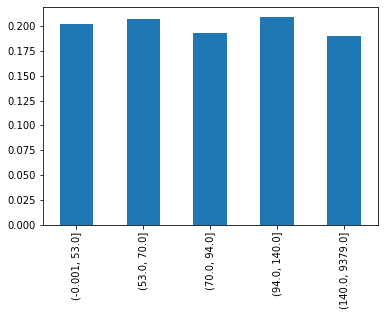

In [72]:
airbnb["price_disc2"].value_counts(normalize = True).sort_index().plot(kind="bar")

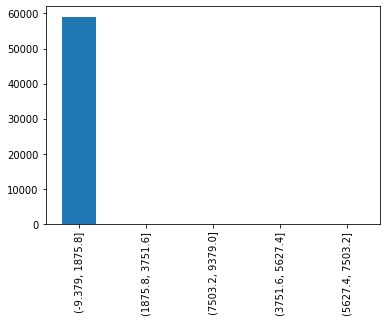

In [73]:
airbnb["price_disc"].value_counts().plot(kind="bar")

# Les tableaux croisés avec Pandas

Les DataFrame possèdent des méthodes pour générer des tableaux croisés, notamment :
```python
frame1.pivot_table()
```
Cette méthode permet de gérer de nombreux cas avec des fonctions standards et sur mesure.

**Exercice :**
    
Afficher un tableau Pivot pour les données AirBnB. On veut afficher les moyenne des prix en fonction de deux colonnes du DataFrame

In [74]:
airbnb.pivot_table(values='price_num',
                   index='room_type',
                   columns='host_is_superhost',
                   aggfunc=['mean','median','count'])

mean             median         count      
host_is_superhost           f           t      f      t      f     t
room_type                                                           
Entire home/apt    115.490176  130.891290   83.0  100.0  45196  5924
Private room       116.742602   90.240580   50.0   60.0   6488  1035
Shared room         68.137019   39.745098   33.0   39.0    416    51

# L'utilisation de GroupBy sur des DataFrame

- `.groupby` permet de rassembler des observations en fonction d’une variable dite de groupe


- Par exemple, `frame.groupby('X').mean()` donnera les moyennes par groupes de `X`


- On peut aussi utiliser `.size()` pour connaître la taille des groupes et utiliser d’autres fonctions (`.sum()`)


- On peut effectuer de nombreuses opérations de traitement avec le groupby


In [75]:
airbnb_group = airbnb.groupby('room_type')
airbnb_group["price_num"].mean()

room_type
Entire home/apt    117.270613
Private room       113.091139
Shared room         65.036403
Name: price_num, dtype: float64

In [76]:
airbnb_group[ ["price_num",'review_scores_rating'] ].agg(["mean","median","std"])

price_num                    review_scores_rating         \
                       mean median         std                 mean median   
room_type                                                                    
Entire home/apt  117.270613   85.0  155.259620            92.884920   95.0   
Private room     113.091139   55.0  229.457124            93.173706   95.0   
Shared room       65.036403   34.0  262.244490            90.774096   93.0   

                            
                       std  
room_type                   
Entire home/apt   8.308599  
Private room      8.453961  
Shared room      11.230092

**Exercice :**
    
- Données sur les salaires


- On utilise le `groupby()` pour rassembler les types d’emploi


- Et on calcule des statistiques pour chaque type


On peut utiliser la méthode `.agg()` avec par exemple `'mean'` comme paramètre

On utilise aussi fréquemment la méthode `.apply()` combinée à une fonction lambda

In [77]:
salaries.groupby("JobTitle")[["TotalPay"]].agg(["mean","median","count"]).sort_values(("TotalPay","mean"),ascending=False)

TotalPay              \
                                                         mean      median   
JobTitle                                                                    
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  399211.275000  399211.275   
Chief Investment Officer                        339653.700000  339653.700   
Chief of Police                                 329183.646667  326716.760   
Chief, Fire Department                          325971.683333  326233.440   
DEPUTY DIRECTOR OF INVESTMENTS                  307899.460000  307899.460   
...                                                       ...         ...   
Commissioner 16.700c, No Pay                        25.760000       0.000   
IS Technician Assistant                              0.000000       0.000   
Not provided                                         0.000000       0.000   
Public Safety Comm Tech                              0.000000       0.000   
Drug Court Coordinator                               0.000000       0.000   

                                                      
                                               count  
JobTitle                                              
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY     2  
Chief Investment Officer                           1  
Chief of Police                                    3  
Chief, Fire Department                             3  
DEPUTY DIRECTOR OF INVESTMENTS                     1  
...                                              ...  
Commissioner 16.700c, No Pay                      50  
IS Technician Assistant                            1  
Not provided                                       4  
Public Safety Comm Tech                            1  
Drug Court Coordinator                             1  

[2159 rows x 3 columns]